In [286]:
import pandas as pd
import numpy as np

columns = [
    "Patient id number", 
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]
pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", index_col=None)
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", 
                   index_col=None, names=columns)
data.head()

,Patient id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [302]:
np.mean([47, 50]), np.mean([52,56]), np.mean([63, 70])
66.5 - 48.5

18.0

In [293]:
data.count()

Patient id number              683
Clump Thickness                683
Uniformity of Cell Size        683
Uniformity of Cell Shape       683
Marginal Adhesion              683
Single Epithelial Cell Size    683
Bare Nuclei                    683
Bland Chromatin                683
Normal Nucleoli                683
Mitoses                        683
Class                          683
dtype: int64

In [297]:
data.mode()

,Patient id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1182404,1,1,1,1,2,1,3,1,1,0


In [288]:
#some data cleaning:

#Turn the "Class" column into 1's and 0's
classes = np.array(data["Class"])
newClasses = [(1 if n == 4 else 0) for n in classes]
data["Class"] = newClasses


# Get rid of the rows that contain unusable question mark entries
# in the "Bare Nuclei" column
data = data[[(False if n=="?" else True) for n in data["Bare Nuclei"]]]


In [289]:
data.describe()

,Patient id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [294]:
data.count()

Patient id number              683
Clump Thickness                683
Uniformity of Cell Size        683
Uniformity of Cell Shape       683
Marginal Adhesion              683
Single Epithelial Cell Size    683
Bare Nuclei                    683
Bland Chromatin                683
Normal Nucleoli                683
Mitoses                        683
Class                          683
dtype: int64

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')


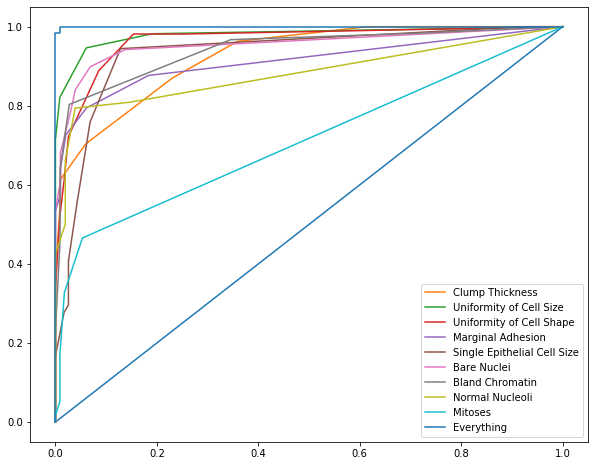

In [292]:
from sklearn.linear_model import LogisticRegression as LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def binaryTrain(model, x, y, name):
    y = np.array(y)
    xtrain, xtest, ytrain, ytest = train_test_split(x,y)
    model.fit(xtrain,ytrain)
    yprobability = model.predict_proba(xtest)[:, 1]
    ypredict = model.predict(xtest)
    fpr, tpr, thresholds =  metrics.roc_curve(ytest, yprobability)
    plt.plot(fpr, tpr, label=name)
    plt.legend()
    

plt.plot([0, 1], [0, 1])
fig = plt.gcf()
fig.set_size_inches(10,8)


lr = LogisticRegression()
for i in range(1,10):
    binaryTrain(lr, np.array(data.iloc[:,i]).reshape(-1,1),
                np.array(data["Class"]), data.columns[i])
    
print(data.iloc[:,range(1,10)].columns)
binaryTrain(lr, data.iloc[:,range(1,10)],
            np.array(data["Class"]), "Everything")
